<a href="https://colab.research.google.com/github/johnpharmd/LS-DS-Unit-1-Project/blob/master/LS_DS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip

--2018-12-12 15:08:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3347213 (3.2M) [application/zip]
Saving to: ‘dataset_diabetes.zip’

dataset_diabetes.zi 100%[===================>]   3.19M  1.81MB/s    in 1.8s    

2018-12-12 15:08:19 (1.81 MB/s) - ‘dataset_diabetes.zip’ saved [3347213/3347213]



In [7]:
!unzip dataset_diabetes.zip

Archive:  dataset_diabetes.zip
  inflating: dataset_diabetes/diabetic_data.csv  
  inflating: dataset_diabetes/IDs_mapping.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
# Make the main and supplemental dataframes
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df1 = df.copy()
icd9_df = pd.read_csv('https://raw.githubusercontent.com/drobbins/ICD9/master/icd9.txt', delimiter='\t', encoding='ISO-8859-1')
icd9_two = icd9_df.copy()

pd.set_option('display.max_columns', None)

In [14]:
print(icd9_df.shape)
icd9_df.head()

(14567, 4)


,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,Unnamed: 3
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae,NaN
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,NaN
2,0019,"Cholera, unspecified",Cholera NOS,NaN
3,0020,Typhoid fever,Typhoid fever,NaN
4,0021,Paratyphoid fever A,Paratyphoid fever a,NaN


In [15]:
icd9_df = icd9_df.drop('Unnamed: 3', axis=1)
icd9_df.columns

Index(['DIAGNOSIS CODE', 'LONG DESCRIPTION', 'SHORT DESCRIPTION'], dtype='object')

In [16]:
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
# df.weight.value_counts()

In [0]:
# Drop 'weight' from df, given that ~96.9% of observations have '?'
df = df.drop('weight', axis=1)
df.columns

In [18]:
# 'Citoglipton' does not appear to be a valid generic drug name for Januvia
df = df.rename(columns={'citoglipton': 'sitagliptin'})
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'sitagliptin', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766

In [38]:
letters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWYXZ'
nums = '0123456789'
df.isin(['?', '+', '-', (letter for letter in letters), (num for num in nums)]).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [56]:
df.isin(['?', '+', '-', (letter for letter in letters)]).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [12]:
len(df.loc[(df.diag_1.isin(['?']) & (df.diag_2.isin(['?'])))])

1

In [55]:
df.isin([num for num in nums]).sum()

encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                      585
diag_2                      208
diag_3                      202
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutam

In [69]:
# Check df for single-character strings
# Method courtesy of Ryan Herr - LambdaSchool
for col in df.select_dtypes(['object']):
  single_character = df[col].str.len() == 1
  print(col, single_character.sum())

race 2273
gender 0
age 0
payer_code 40256
medical_specialty 49949
diag_1 606
diag_2 566
diag_3 1625
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
sitagliptin 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [81]:
df.isin(['3', '5', '7', '8', '9']).sum()

encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                      585
diag_2                      208
diag_3                      202
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutam

In [82]:
# This check, plus the two immediately above, show that string values in
# diag_1, diag_2, and diag_3 are each of the set ('3', '5', '7', '8', '9', '?')
df.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [21]:
df.isna().sum().sum()

0

In [22]:
df.isnull().sum().sum()

0

### At this point, I am provisionally satisfied that data is sufficiently clean to proceed with final preparation for exploratory analysis. Have to format ICD-9 codes to be the same in both dataframes, first, however.

In [20]:
# Format ICD-9 codes the same for both df's
# Compare how ICD-9 codes are constructed in each dataframe
print('in icd9_df:', [x for x in icd9_df['DIAGNOSIS CODE'] if '3' in x][:10])

print('in df:', [y for y in df.diag_1 if '3' in y][:10])

in icd9_df: ['0023', '0030', '0031', '00320', '00321', '00322', '00323', '00324', '00329', '0038']
in df: ['250.83', '398', '434', '737', '473', '432', '423', '403', '398', '403']


In [0]:
icd9_df = icd9_df.applymap(lambda x: x.rstrip('.0'))
print('in icd9_df:', [x for x in icd9_df['DIAGNOSIS CODE'] if 'V2' in x][:10])

In [23]:
# This shows that all '.0' substrings were stripped from icd9_df
icd9_df['DIAGNOSIS CODE'].value_counts()
icd9_df.isin(['.0']).sum()

DIAGNOSIS CODE       0
LONG DESCRIPTION     0
SHORT DESCRIPTION    0
dtype: int64

In [24]:
# Check how many values in icd9_df need to have a '.' inserted between a 3rd character and a 4th character
count = 0
for col in icd9_df:
  for value in icd9_df[col]:
    if len(value) > 3:
      count += 1
print('count:', count)

count: 42704


In [25]:
# Write helper function that will add dot to codes with 4+ characters
def format_val(val):
  if '.' in val:
    return val
  if len(val) > 3:
    val = val[:3] + '.' + val[3:]
    val.rstrip('0')
  return val


# Use helper function to convert codes
icd9_df['DIAGNOSIS CODE'] = icd9_df['DIAGNOSIS CODE'].map(format_val)

print('This is icd9_df:\n', icd9_df)

This is icd9_df:
       DIAGNOSIS CODE                                   LONG DESCRIPTION  \
0                001                     Cholera due to vibrio cholerae   
1              001.1              Cholera due to vibrio cholerae el tor   
2              001.9                               Cholera, unspecified   
3                002                                      Typhoid fever   
4              002.1                                Paratyphoid fever A   
5              002.2                                Paratyphoid fever B   
6              002.3                                Paratyphoid fever C   
7              002.9                     Paratyphoid fever, unspecified   
8                003                         Salmonella gastroenteritis   
9              003.1                              Salmonella septicemia   
10             003.2        Localized salmonella infection, unspecified   
11            003.21                              Salmonella meningitis   
12     

In [26]:
print(len(df.loc[df['diag_1'].isin(['197'])]))
icd9_df.loc[icd9_df['DIAGNOSIS CODE'].isin(['197'])]

320


,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION
1619,197,Secondary malignant neoplasm of lung,Secondary malig neo lung


In [27]:
8 in df.diag_1, 8 in icd9_df['DIAGNOSIS CODE']

(True, True)

In [28]:
# Time to map English diagnoses in icd9_df to ICD-9 codes in df
# Test code snippets
for value in df.diag_1[:3]:
  # print
  for item in icd9_df.loc[icd9_df['DIAGNOSIS CODE'] == value]['SHORT DESCRIPTION']:
    print(item)

DMI oth uncntrld
Hyperosmolality
Diabetes in preg-unspec


In [29]:
# Start making new column 'short_first_diag'
short_primary_dx_descrip = []
for value in df.diag_1:
  for item in icd9_df.loc[icd9_df['DIAGNOSIS CODE'] == value]['SHORT DESCRIPTION']:
    short_primary_dx_descrip.append(item)

for val in short_primary_dx_descrip[50:55]:
  print(val, '\n')
print('len(short_primary_dx_descrip):', len(short_primary_dx_descrip))

Vaginal wall prolpse NOS 

Malig neo corpus uteri 

DMII circ nt st uncntrld 

Sprain of ankle NOS 

Hemopericardium 

len(short_primary_dx_descrip): 87278


In [39]:
# Start making another new column 'short_second_diag'
short_2ndary_dx_descrip = []
for value in df.diag_2:
  for item in icd9_df.loc[icd9_df['DIAGNOSIS CODE'] == value]['SHORT DESCRIPTION']:
    short_2ndary_dx_descrip.append(item)

for val in short_2ndary_dx_descrip[50:55]:
  print(val, '\n')
print('len(short_2ndary_dx_descrip):', len(short_2ndary_dx_descrip))

Cong factor viii diord 

Extrinsic asthma NOS 

Tox dif goiter no crisis 

Status cardc dvce unspcf 

Post MI syndrome 

len(short_2ndary_dx_descrip): 84086


In [0]:
# Make first iteration of new columns that show English diagnosis for 'diag_1' and 'diag_2' in df
df1['short_first_diag'] = pd.Series(short_primary_dx_descrip)
df1['short_second_diag'] = pd.Series(short_2ndary_dx_descrip)

In [42]:
# df1 = df1.drop('weight', axis=1)
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,short_first_diag,short_second_diag
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,DMI oth uncntrld,DMI wo cmp nt st uncntrl
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Hyperosmolality,DMI renal uncntrld
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Diabetes in preg-unspec,Mal neo pancreas head
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Closed skull vault fx,Post MI syndrome
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Secondary malig neo lung,Post MI syndrome


In [49]:
# Make another copy, then rearrange columns in df
df2 = df1.copy()
cols = df2.columns.tolist()
cols = cols[:5] + cols[17:18] + cols[-2:-1] + cols[18:19] + cols[-1:] + cols[20:21] + cols[5:17] + cols[19:-2]
df2 = df2[cols]
df2.head()

,encounter_id,patient_nbr,race,gender,age,diag_1,short_first_diag,diag_2,short_second_diag,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),250.83,DMI oth uncntrld,?,DMI wo cmp nt st uncntrl,1,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),276,Hyperosmolality,250.01,DMI renal uncntrld,9,1,1,7,3,?,?,59,0,18,0,0,0,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),648,Diabetes in preg-unspec,250,Mal neo pancreas head,6,1,1,7,2,?,?,11,5,13,2,0,1,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),8,Closed skull vault fx,250.43,Post MI syndrome,7,1,1,7,2,?,?,44,1,16,0,0,0,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),197,Secondary malig neo lung,157,Post MI syndrome,5,1,1,7,1,?,?,51,0,8,0,0,0,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Start the exploratory analysis!

In [0]:
df.race.value_counts()

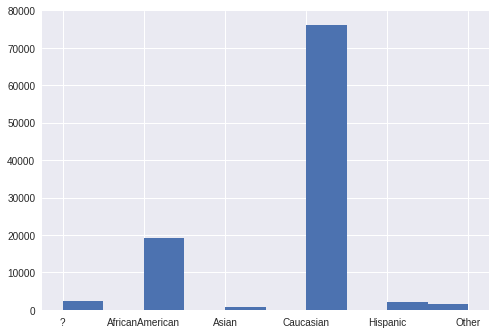

In [57]:
df.race.hist();

In [67]:
df.age.describe()

count      101766
unique         10
top       [70-80)
freq        26068
Name: age, dtype: object

In [51]:
df.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

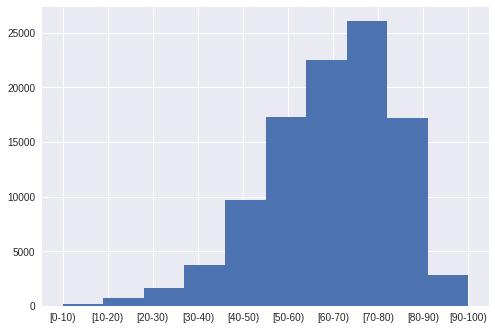

In [56]:
# Histogram of age groups
df.age.hist();

In [0]:
df.diag_1.value_counts()

In [0]:
df.A1Cresult.value_counts()

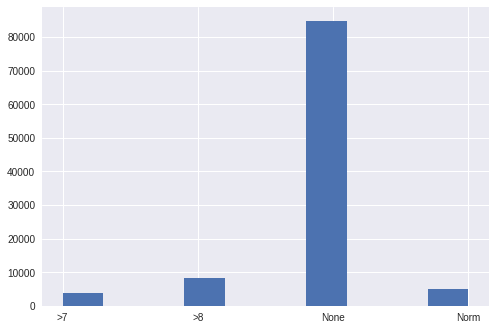

In [60]:
df.A1Cresult.hist();

In [61]:
df.max_glu_serum.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [0]:
df.metformin.value_counts()

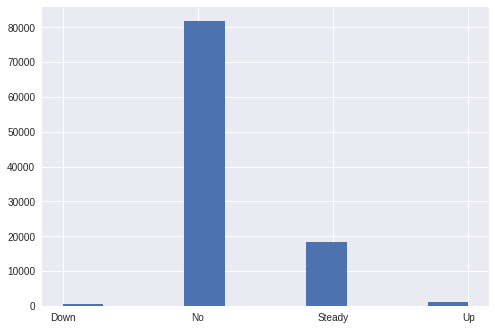

In [65]:
df.metformin.hist();

In [69]:
df.insulin.value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

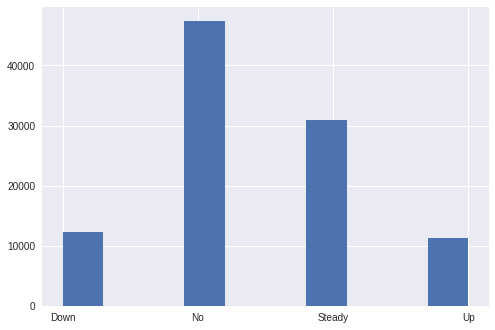

In [70]:
df.insulin.hist();

In [85]:
# Number of individuals in df2 who were taking both metformin and insulin
len(df2[(df2.metformin != 'No') & (df2.insulin != 'No')])

10012

In [88]:
# Number of individuals in df2 who were taking metformin and had a maximum serum glucose measurement
len(df2.loc[(df2.metformin != 'No') & (df2.max_glu_serum != 'None')])

782

In [0]:
# Make another copy  # and groupby 'metformin'
df3 = df2.copy()
# df3 = df3.groupby('metformin')

In [101]:
# Prepare and explore crosstabs of df3
df3.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,diag_1,short_first_diag,diag_2,short_second_diag,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,87278,101766,84086,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,717,626,749,598,NaN,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,790,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),428,CHF NOS,276,Hyperosmolality,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,6862,6862,6752,6752,NaN,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,11555,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.422607,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.933600,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
metformin_vs_age_ctab = pd.crosstab(df3.age, df3.metformin == 'No')
# metformin_vs_age_ctab.rename(columns={False: 'Yes', True: 'No'})
metformin_vs_age_ctab.columns = ['Yes', 'No']
metformin_vs_age_ctab

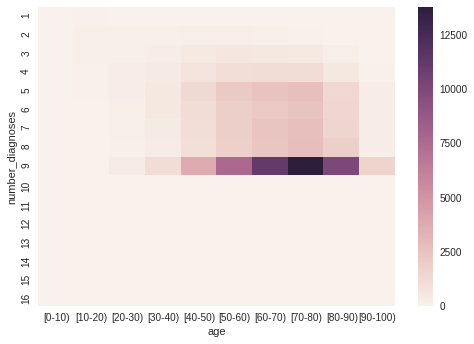

In [157]:
num_diagnoses_vs_age_ctab = pd.crosstab(df.age, df.number_diagnoses)
num_diagnoses_vs_age_ctab
sns.heatmap(num_diagnoses_vs_age_ctab.T);

In [161]:
num_diagnoses_vs_metformin_ctab = pd.crosstab(df3.metformin == 'No', df.number_diagnoses)
num_diagnoses_vs_metformin_ctab.rename(index={False: 'Yes', True: 'No'}, inplace=True)
num_diagnoses_vs_metformin_ctab

number_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
metformin,,,,,,,,,,,,,,,,
Yes,23,211,751,1423,2563,2206,2294,2251,8250,3,5,0,3,1,2,2
No,196,812,2084,4114,8830,7955,8099,8365,41224,14,6,9,13,6,8,43


### Now ready to make and test hypotheses about the data